Тема “Тематическое моделирование”

Задание 1. Взять ноутбук с вебинара изменить тематики (минимум 3-ри тематики взять) построить тематическую модель, попробовать проинтерпретировать полученные тематики. Насколько они похожи на то что вы выделяли из корпуса. Возможно большее количество тематик так же хорошо интерпретируется проверьте это. Подберите оптимальное количество тематик с точки зрения интерпретации результатов. Не забывайте чтобы получить хорошие тематики надо хорошо почистить тексты.

Задание 2. Просмотрите вторую часть ноутбука с библиотекой bigArtm. В ноутбуке есть инструкция как её устанавливать. Проще это делать в колабе. Просто ознакомиться

Задание 3. Просмотрите ноутбук по ссылке он довольно большой и интересный. 
https://github.com/klyshinsky/NLP_VVSU_2021/blob/main/Lecture_20210511-W2V.ipynb
это курс по компьютерной лингвистике довольно интересный, но небольшой. Полезно просто ознакомиться с ноутбуком.


In [ ]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
!pip install pymorphy2

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
from razdel import tokenize
from string import punctuation

from multiprocessing import Pool
from tqdm import tqdm_notebook as tqdm

In [6]:
RANDOM_STATE = 42
NUM_THREADS = 8

##Загрузка данных

In [14]:
pd.set_option("max_colwidth", None)
df = pd.read_csv('lenta-ru-news.csv.gz', usecols=[2])
df.head()

,text
0,"Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее."
1,"Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное преступление. Максимальное наказание за его употребление — три года тюрьмы."
2,"Сотрудники социальной сети Instagram проанализировали поставленные пользователями смайлики, геолокации и хештеги и опубликовали итоги 2018 года. Об этом сообщается на официальном сайте Instagram. Таким образом, самой счастливой геолокацией Instagram признал Диснейленд в Токио, так как больше всего счастливых смайликов в 2018 году пользователи ставили именно под фотографиями из японского Диснейленда. Также эксперты назвали самый популярный фильтр для лица: им стал фильтр с сердечками на глазах. А, например, самыми часто используемыми хештегами в 2018 году были #metoo, #timesup и #marchforourlives. В ноябре сотрудники британской ассоциации потребителей Which? составили рейтинг самых безопасных стран для путешествий. Специалисты проанализировали 20 самых популярных туристических направлений по четырем критериям: уровень преступности, угроза здоровью, вероятность теракта и стихийных бедствий. Самой безопасной страной по всем параметрам стала Исландия."
3,"С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3 миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера Мюллера показало, что по меньшей мере 14 человек из окружения президента США Дональда Трампа контактировали с россиянами во время его избирательной кампании и последующего переходного периода перед вступлением в должность главы государства. Мюллер с 2017 года ведет дело о якобы российском вмешательстве в американские выборы в 2016-м. Перед ним поставлена задача выяснить, был ли сговор между штабом Трампа и Россией. Кремль и Белый дом отвергают все обвинения. Россию неоднократно обвиняли во вмешательстве в выборы президента США с помощью хакеров. В июне спецслужбы выдвинули заочное обвинение 12 российским разведчикам. По данным спецслужб США, российская разведка использовала две х

In [15]:
len(df)

739351

In [16]:
# Возьму выборку в 40к текстов для быстрой обрабокти и обучения моделей
data = df.sample(40000, random_state=RANDOM_STATE)
data.shape

(40000, 1)

##Предобработка текста

In [17]:
sw = set(get_stop_words("ru"))
morpher = MorphAnalyzer()

In [18]:
def preprocess_txt(text):
        
    # Чистим пунктуацию
    text = re.sub(fr'[{punctuation}]+', ' ', text)
    
    # Убираем всё, не являющееся набором букв, + цифры
    text = ' '.join(word for word in text.split() if word.isalpha())

    # Приводим к общему регистру
    text = text.lower()
    
    # Токенизация с помощью библиотеки razdel
    text = [token.text for token in list(tokenize(text))]
    
    # Лемматизация
    text = [morpher.parse(word)[0].normal_form for word in text]
    
    # Убираем стопслова
    text = [word for word in text if word not in sw]
    
    # Возвращаем обработанный текст
    return text


In [19]:
%%time

with Pool(NUM_THREADS) as p:
    data['processed_text'] = list(tqdm(p.imap(preprocess_txt, data['text']), total=len(data)))

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/40000 [00:00<?, ?it/s]

CPU times: user 1min 28s, sys: 11.6 s, total: 1min 39s
Wall time: 23min 7s


In [20]:
data['processed_text'].sample(3)

110561                                           [украинский, власть, опасаться, возможный, снятие, сша, антироссийский, санкция, прекращение, вашингтон, финансовый, поддержка, киев, четверг, ноябрь, ссылка, источник, администрация, президент, украина, пётр, порошенко, сообщать, rt, штаб, новый, президент, слабый, дональд, трамп, делать, собеседник, отмечаться, победить, выборы, сша, республиканец, посещать, украина, знакомый, некоторый, украинский, бизнесмен, ранее, сми, украинский, политика, отправить, трамп, поздравление, победа, выборы, глава, государство, порошенко, заявить, рассчитывать, продолжение, поддержка, соединить, штат, борьба, реализация, масштабный, реформа, страна, бывший, премьер, министр, украина, арсений, яценюк, предостеречь, трамп, признание, крым, российский, выборы, президент, сша, пройти, вторник, ноябрь, победить, кандидат, республиканец, дональд, трамп, инаугурация, наметить, январь]
239164                                                                      

##Построение модели

Модель использует векторное представление документов, например, мешок слов (bow), поэтому сперва создадим словарь:

In [ ]:
!pip install -U gensim

In [22]:
from gensim.models import *
from gensim import corpora

In [23]:
dictionary = corpora.Dictionary(data['processed_text'])
len(dictionary)

123829

Уберём из словаря очень редкие и очень частые слова:

In [24]:
dictionary.filter_extremes(no_below = 8, no_above = 0.7, keep_n=None)
len(dictionary)

23797

In [25]:
# Векторизуем документы:
corpus = [dictionary.doc2bow(text) for text in data['processed_text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

In [26]:
# Изначальное количество тем
NUM_TOPICS = 5

In [27]:
%time 
lda_model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS , passes=2, random_state=RANDOM_STATE)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


Проверим, насколько модель научилась разделять тематики

In [28]:
def get_topics_words(model, n_topics):
    
    x = lda_model.show_topics(num_topics=n_topics, num_words=10, formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

    for topic, words in topics_words:
        print(f"topic_{topic}: " + " ".join(words))

In [29]:
get_topics_words(lda_model, NUM_TOPICS)

topic_0: процент компания доллар миллион рубль миллиард тысяча россия банк рынок
topic_1: россия президент заявить страна свой глава российский украина министр слово
topic_2: самолёт новый компания учёный система сообщать работа пользователь сайт свой
topic_3: сообщать дело город произойти находиться полиция сотрудник задержать данные погибнуть
topic_4: свой стать матч игра фильм сообщать команда мир сборная the


Модель хорошо разделяет тематики

На полученные темы можно посмотреть, изобразив их на плоскости с помощью библиотеки pyLDAvis. 

In [ ]:
!pip install pyLDAvis

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
%time lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_viz)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping
/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


CPU times: user 12 s, sys: 495 ms, total: 12.5 s
Wall time: 14.2 s


Посмотрим на метрики качества получившейся модели: перплексию и среднюю когерентность

In [32]:
print('Персплексия: ', np.exp(lda_model.log_perplexity(corpus)))

Персплексия:  0.00029108158512342123


In [33]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.4719444418062574


Выявим количество тематик, дающее наибольшую метрику
средней когерентности:

<ipython-input-50-b726613b593e>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n_topics in tqdm(topics_list):


  0%|          | 0/9 [00:00<?, ?it/s]

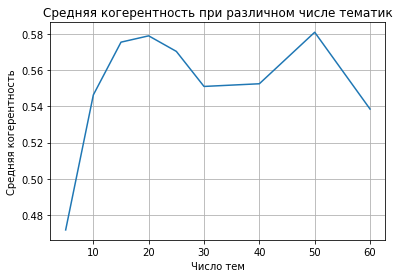

In [50]:
topics_list = [5, 10, 15, 20, 25, 30, 40, 50, 60]
coherences = []

for n_topics in tqdm(topics_list):
    lda_model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=n_topics,
                                  passes=2, random_state=RANDOM_STATE)
    coherences.append(CoherenceModel(model=lda_model, texts=data['processed_text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.title('Средняя когерентность при различном числе тематик')
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.grid()
plt.show()

Наибольшую метрику показывает модель с разделением на 50 тематик

In [47]:
NUM_TOPICS = 50

In [48]:
lda_model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS , passes=2, random_state=RANDOM_STATE)

In [49]:
get_topics_words(lda_model, NUM_TOPICS)

topic_0: сша американский президент штат свой нью обама трамп йорк буш
topic_1: президент выборы партия депутат глава россия совет госдума пост владимир
topic_2: место рейтинг самый список оказаться занять состояние богатый джексон forbes
topic_3: москва строительство проект город центр комплекс здание объект участок площадь
topic_4: донецкий донбасс номинация народный луганский алкоголь днр украинский самопровозглашённый напиток
topic_5: язык бренд русский модель новый студент представить компания школа польша
topic_6: грузия грузинский южный осетия российский памятник россия москва республика абхазия
topic_7: компания устройство новый система microsoft технология apple приложение церковь компьютер
topic_8: сотрудник мвд орган правоохранительный задержать сообщить район чечня милиция новость
topic_9: птица клетка вид помощь использовать кошка мозг организм рыба свой
topic_10: смерть врач скончаться медицинский умереть лечение больница мария кладбище елена
topic_11: самолёт аэропорт ав

Получили много распределений слов в темах, у большинства из которых легко
обозначить их направленность. Некоторые темы пересекаются
с другими, например, связанные с политикой, экономикой. Можно попробовать остановиться на предыдущем пиковом значении метрики, достигаемом при 20 тематиках. 